# Deliverable 2: Scrape and analyze Mars weather data

In [34]:
%matplotlib inline

In [35]:
# Imports for web scraping
from splinter import Browser
from bs4 import BeautifulSoup

# Imports for analysis
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [36]:
# Set Chrome as default browser, visit the website, and create soup object
browser = Browser('chrome')

url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [37]:
# Find and scrape the table and the table rows from he website using BeautifulSoup
table = soup.find('table', class_= 'table')

# All rows after the header row are assigned the 'data-row' class
rows = table.find_all('tr', class_= 'data-row')

In [ ]:
# Need to loop through each row to extract the data from it and turn it into a dictionary: 
# id, terrestrial_date, sol, ls, month, min_temp, pressure
# Create an empty list to store the dicts

mars_temp = []

for row in rows:
    id = row.find_all('td')[0].text
    terrestrial_date = row.find_all('td')[1].text
    sol = row.find_all('td')[2].text
    ls = row.find_all('td')[3].text
    month = row.find_all('td')[4].text
    min_temp = row.find_all('td')[5].text
    pressure = row.find_all('td')[6].text
    
    mars_temp.append({
        'id': id,
        'terrestrial_date': terrestrial_date,
        'sol': sol,
        'ls': ls,
        'month': month,
        'min_temp': min_temp,
        'pressure': pressure
    })

mars_temp

In [39]:
# Assemble into Pandas dataframe
# Headers should be: id, terrestrial_date, sol, ls, month, min_temp, pressure
mars_df = pd.DataFrame.from_records(mars_temp)

# Confirm dataframe was made successfully with correct shape and headers
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [40]:
# Examine the data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [41]:
# Change data types for analysis
mars_df[['id', 'sol', 'ls', 'month']] = mars_df[['id', 'sol', 'ls', 'month']].astype(int)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df[['min_temp', 'pressure']] = mars_df[['min_temp', 'pressure']].astype(float)

# Confirm succesful change
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [42]:
# How many months exist on mars?
# Cannot calculate how many months exist based on terrestrial date...
# Must go based off dataset... find max value of the martian month
mars_months = mars_df['month'].max()

print(f'According to the data we have, there are {mars_months} martian months.')

According to the data we have, there are 12 martian months.


In [43]:
# How many martian days' worth of data are there?
# .count() will just count how many total records there are...
# but what if there are multiple records for a single day?
# we want the count of unique sols there are in the dataset
martian_days = len(mars_df['sol'].unique())
print(f"We have {martian_days} martian days' worth of data in our dataset")

We have 1867 martian days' worth of data in our dataset


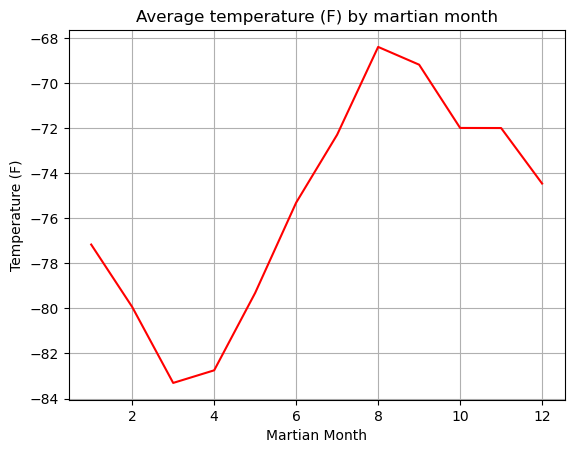

In [51]:
# Plot the average temperature by month
# create new dataframe with only months and and min_temp sorted by month acsending
# Group mars_df by month, find average of min_temp by each month
avgtemp_df = mars_df[['month', 'min_temp']].groupby(['month']).mean()

# Plot results
plt.plot(avgtemp_df, color= 'red')
plt.title('Average temperature (F) by martian month')
plt.xlabel('Martian Month')
plt.ylabel('Temperature (F)')
plt.grid(True)

# Save the figure to Figure Outputs
plt.savefig('figure_outputs/avg_temp.png', bbox_inches='tight')

In [45]:
# Identify the coldest and hottest months in Curiosity's location
# Grab hottest month AND hottest temp from avgtemp_df
hottest_month = avgtemp_df['min_temp'].idxmax()
hottest_temp = avgtemp_df['min_temp'].max()

# Grab coldest month AND coldest temp from avgtemp_df
coldest_month = avgtemp_df['min_temp'].idxmin()
coldest_temp = avgtemp_df['min_temp'].min()

print(f'The coldest month on Mars is month {coldest_month} with an average temperature of {float(round(coldest_temp, 4))}.')
print(f'The hottest month on Mars is month {hottest_month} with an average temperature of {float(round(hottest_temp, 4))}.')

The coldest month on Mars is month 3 with an average temperature of -83.3073.
The hottest month on Mars is month 8 with an average temperature of -68.383.


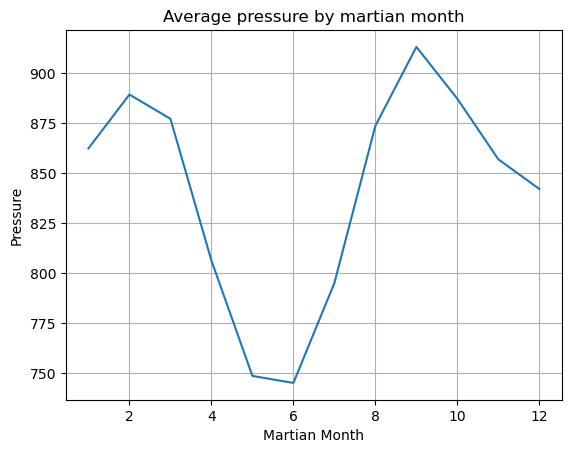

In [50]:
# 4. Average pressure by Martian month
avgpressure_df = mars_df[['month', 'pressure']].sort_values(['month'])

# .groupby month, find average of pressure by each month
avgpressure_df = avgpressure_df.groupby(['month']).mean()

# Plot results
plt.plot(avgpressure_df)
plt.title('Average pressure by martian month')
plt.xlabel('Martian Month')
plt.ylabel('Pressure')
plt.grid(True)

# Save the figure to Figure Outputs
plt.savefig('figure_outputs/avg_pressure.png', bbox_inches='tight')

In [47]:
# Identify high and low pressure months in Curiosity's location
# Grab highest pressure month AND highest pressure from avgpressure_df
high_pressure_month = avgpressure_df['pressure'].idxmax()
high_pressure = avgpressure_df['pressure'].max()

# Grab lowest pressure month AND lowest pressure from avgpressure_df
low_pressure_month = avgpressure_df['pressure'].idxmin()
low_pressure = avgpressure_df['pressure'].min()

print(f'The month with the highest pressure on Mars is month {high_pressure_month} with an average pressure of {float(round(high_pressure, 4))}.')
print(f'The month with the lowest pressure on Mars is month {low_pressure_month} with an average pressure of {float(round(low_pressure, 4))}.')

The month with the highest pressure on Mars is month 9 with an average pressure of 913.306.
The month with the lowest pressure on Mars is month 6 with an average pressure of 745.0544.


In [48]:
browser.quit()